In [1]:
#NOTE: Trained on the filtered CGM data
#NOTE: Add 1 more lag and an attention layer

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from Glucose_processor import GlucoseDataProcessor
from models.model_C import BloodGlucosePredictorC

In [2]:
# Define prediction horizons (in minutes, adjust as needed)
horizons = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120]

# Initialize the BloodGlucosePredictor
bg_predictor = BloodGlucosePredictorC(horizons=horizons)

In [3]:
Glucose_data = GlucoseDataProcessor(CGM_file_path="CGM_data.csv", bolus_file_path="Bolus_data.csv", carb_file_path="Carb_data.csv",
                                    min_range=69, max_range=180, target=85, tp=75, td=280, dp=45, dd=180)


df = Glucose_data.create_filtered_DataFrame()

df

Time         CGM  Insulin Activity  Food Activity
3255  2024-12-09 01:57:16   74.633941          0.000000       0.000000
3254  2024-12-09 02:02:16   77.013161          0.000000       0.000000
3253  2024-12-09 02:07:16   79.895722          0.000000       0.000000
3252  2024-12-09 02:12:16   83.361943          0.000000       0.000000
3251  2024-12-09 02:17:16   87.477852          0.000000       0.000000
...                   ...         ...               ...            ...
4     2024-12-20 13:51:28  149.673834          0.032914       0.130190
3     2024-12-20 13:56:27  152.754635          0.032283       0.123480
2     2024-12-20 14:01:27  155.653519          0.031558       0.116350
1     2024-12-20 14:06:27  158.336854          0.030786       0.108902
0     2024-12-20 14:11:27  160.773267          0.029946       0.101206

[3256 rows x 4 columns]

In [4]:
# Preprocess the data
X_scaled, y_scaled = bg_predictor.preprocess_data(df)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Build the model
input_shape = (1, X_train.shape[1])  # Shape required for LSTM (timesteps=1, features=X_train.shape[1])
bg_predictor.build_model(input_shape=input_shape)

df

d:\DiaPulse\models\model_C.py:21: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)  # Linear interpolation for missing values


Time         CGM  Insulin Activity  Food Activity  hour  \
3250 2024-12-09 02:22:16   92.286805          0.000000            0.0     2   
3249 2024-12-09 02:27:16   97.802204          0.000000            0.0     2   
3248 2024-12-09 02:32:16  104.002860          0.000000            0.0     2   
3247 2024-12-09 02:37:16  110.830518          0.000000            0.0     2   
3246 2024-12-09 02:42:16  118.188673          0.000000            0.0     2   
...                  ...         ...               ...            ...   ...   
28   2024-12-20 11:51:28  106.108622          0.001403            0.0    11   
27   2024-12-20 11:56:28  105.806528          0.001336            0.0    11   
26   2024-12-20 12:01:28  105.424442          0.001270            0.0    12   
25   2024-12-20 12:06:27  104.989302          0.001203            0.0    12   
24   2024-12-20 12:11:27  104.541506          0.001269            0.0    12   

      day_of_week  is_weekend  hour_fraction  hour_sin  hour_cos  ...  \
3250            0           0       0.098611  0.580703  0.814116  ...   
3249            0           0       0.102083  0.598325  0.801254  ...   
3248            0           0       0.105556  0.615661  0.788011  ...   
3247            0           0       0.109028  0.632705  0.774393  ...   
3246            0           0       0.112500  0.649448  0.760406  ...   
...           ...         ...            ...       ...       ...  ...   
28              4           0       0.493750  0.039260 -0.999229  ...   
27              4           0       0.497222  0.017452 -0.999848  ...   
26              4           0       0.500694 -0.004363 -0.999990  ...   
25              4           0       0.504167 -0.026177 -0.999657  ...   
24              4           0       0.507639 -0.047978 -0.998848  ...   

         BG_t+75     BG_t+80     BG_t+85     BG_t+90     BG_t+95    BG_t+100  \
3250  181.943799  181.827779  180.515752  178.121324  174.788871  170.680939   
3249  181.827779  180.515752  178.121324  174.788871  170.680939  165.966344   
3248  180.515752  178.121324  174.788871  170.680939  165.966344  160.810709   
3247  178.121324  174.788871  170.680939  165.966344  160.810709  155.370319   
3246  174.788871  170.680939  165.966344  160.810709  155.370319  149.788790   
...          ...         ...         ...         ...         ...         ...   
28    118.539996  121.911326  125.417160  128.991958  132.581176  136.144884   
27    121.911326  125.417160  128.991958  132.581176  136.144884  139.656314   
26    125.417160  128.991958  132.581176  136.144884  139.656314  143.096135   
25    128.991958  132.581176  136.144884  139.656314  143.096135  146.444061   
24    132.581176  136.144884  139.656314  143.096135  146.444061  149.673834   

        BG_t+105    BG_t+110    BG_t+115    BG_t+120  
3250  165.966344  160.810709  155.370319  149.788790  
3249  160.810709  155.370319  149.788790  144.195864  
3248  155.370319  149.788790  144.195864  138.708225  
3247  149.788790  144.195864  138.708225  133.431383  
3246  144.195864  138.708225  133.431383  128.460947  
...          ...         ...         ...         ...  
28    139.656314  143.096135  146.444061  149.673834  
27    143.096135  146.444061  149.673834  152.754635  
26    146.444061  149.673834  152.754635  155.653519  
25    149.673834  152.754635  155.653519  158.336854  
24    152.754635  155.653519  158.336854  160.773267  

[3227 rows x 39 columns]

In [5]:
# Train the model
model_save_path = 'saved_models/model_C.keras'
history = bg_predictor.train(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=2000,
    model_save_path=model_save_path
)

history

Epoch 1/2000


d:\DiaPulse\venv\lib\site-packages\keras\src\ops\nn.py:827: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1067 - mae: 0.2630 - val_loss: 0.0201 - val_mae: 0.1020
Epoch 2/2000
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0269 - mae: 0.1208 - val_loss: 0.0159 - val_mae: 0.0907
Epoch 3/2000
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0214 - mae: 0.1065 - val_loss: 0.0151 - val_mae: 0.0907
Epoch 4/2000
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0198 - mae: 0.1035 - val_loss: 0.0151 - val_mae: 0.0879
Epoch 5/2000
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0181 - mae: 0.0981 - val_loss: 0.0129 - val_mae: 0.0815
Epoch 6/2000
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0156 - mae: 0.0906 - val_loss: 0.0117 - val_mae: 0.0766
Epoch 7/2000
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0143 - mae: 0.0857 - val_loss: 0.0103 - val_mae: 0.0723
Epoch 8/2000
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mae: 0.0805 - val_loss: 0.0095 - val_mae: 0.0692
Epoch 9/2000
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0116 -

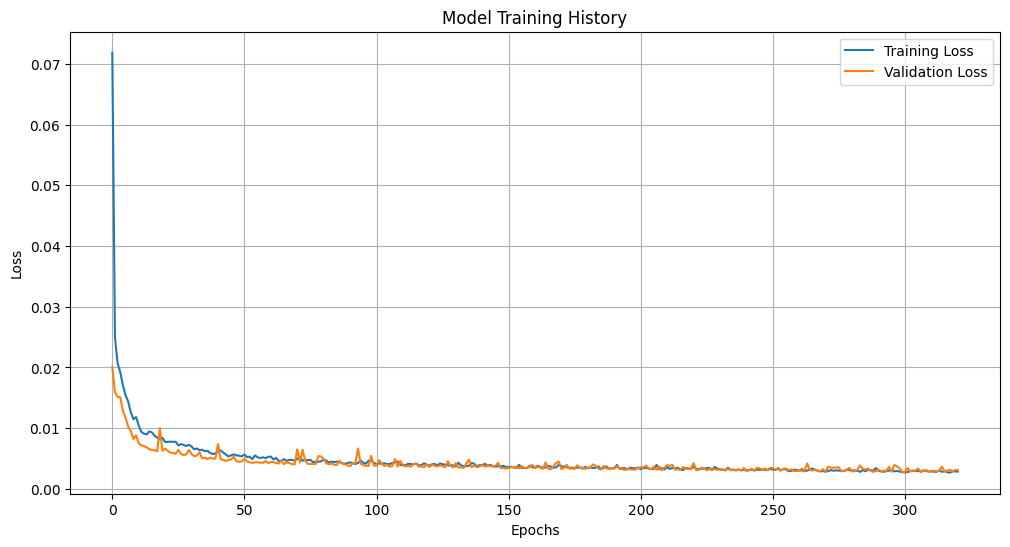

In [6]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Evaluate the model on test data
loss, mae = bg_predictor.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

Test Loss: 0.0025, Test MAE: 0.0335


d:\DiaPulse\venv\lib\site-packages\keras\src\ops\nn.py:827: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


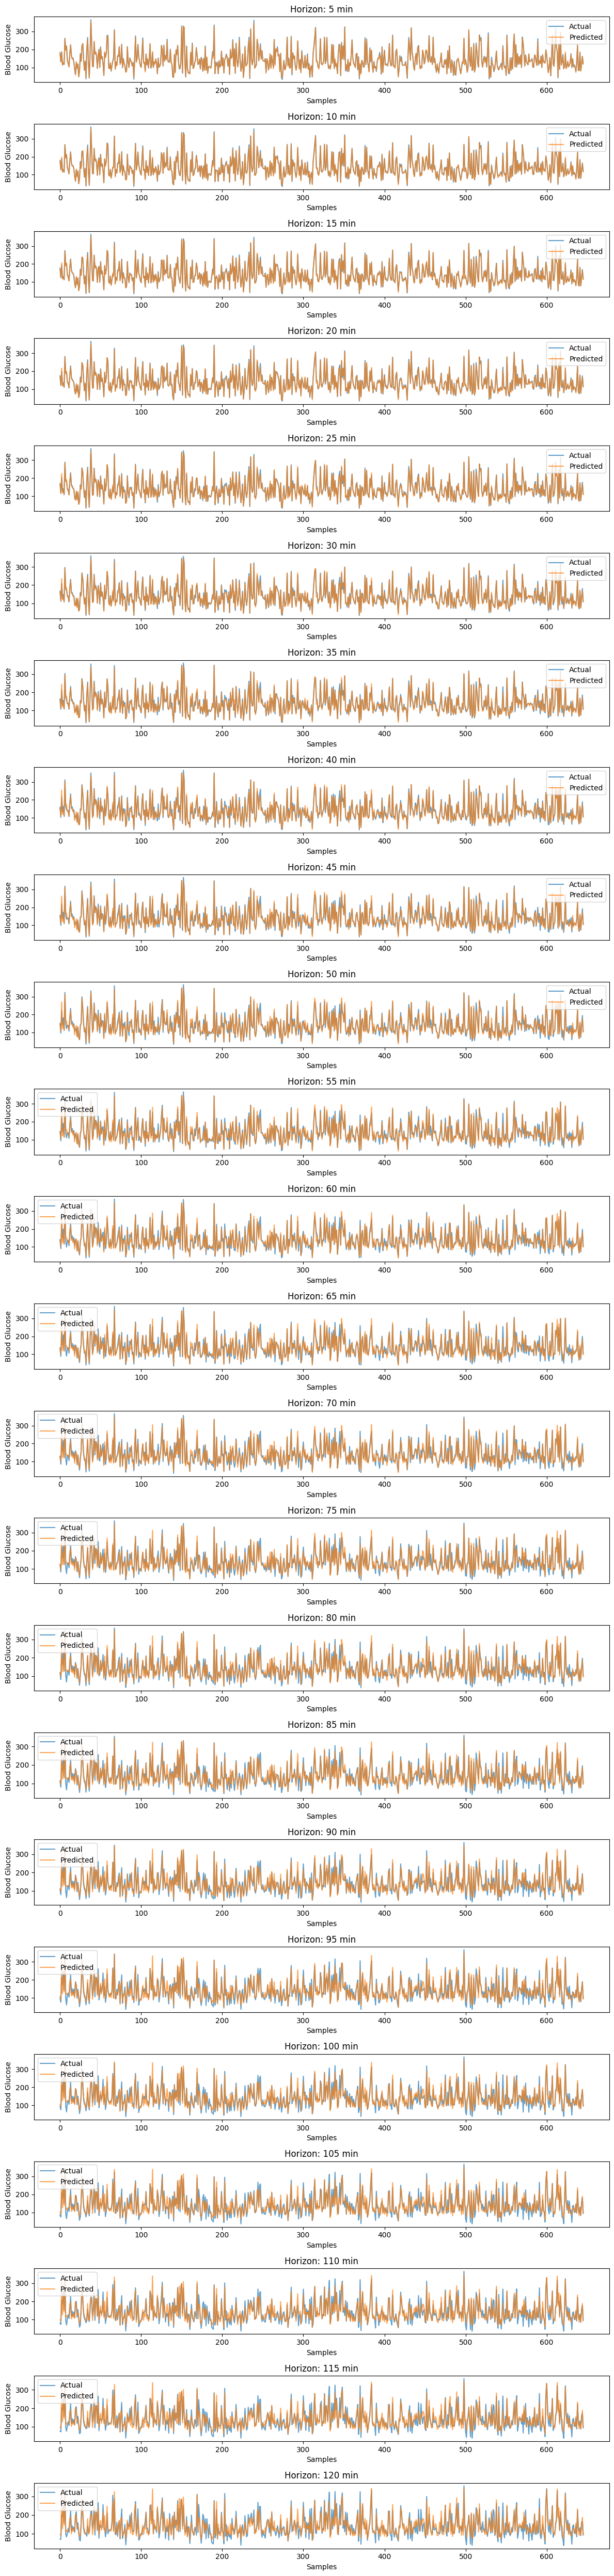

In [8]:
# Make predictions on test data
y_pred = bg_predictor.predict(X_test)

# Visualize predictions vs actual
plt.figure(figsize=(12, 50))
for i, horizon in enumerate(horizons):
    plt.subplot(len(horizons), 1, i + 1)
    plt.plot(bg_predictor.scaler_y.inverse_transform(y_test)[:, i], label='Actual', alpha=0.7)
    plt.plot(y_pred[:, i], label='Predicted', alpha=0.7)
    plt.title(f'Horizon: {horizon} min')
    plt.xlabel('Samples')
    plt.ylabel('Blood Glucose')
    plt.legend()
    plt.tight_layout()
plt.show()

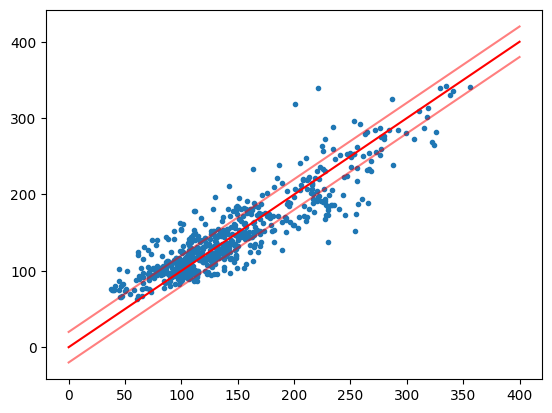

In [34]:
plt.figure()

i = 23 # Where {0: 5 min, 1: 10 min, 2: 15 min, ... 22: 120 min}

plt.plot(bg_predictor.scaler_y.inverse_transform(y_test)[:, i], y_pred[:, i], ".")

x = np.linspace(0, 400, 100)

plt.plot(x, x, "r")
plt.plot(x, x+20, "r", alpha=0.5)
plt.plot(x, x-20, "r", alpha=0.5)

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


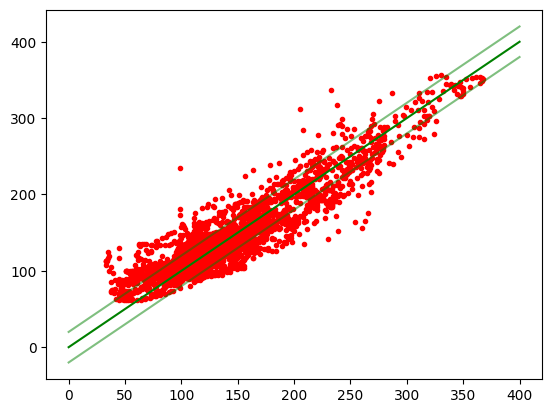

In [40]:
# Training data!!

y_train_pred = bg_predictor.predict(X_train)

plt.figure()

i = 22 # Where {0: 5 min, 1: 10 min, 2: 15 min, ... 22: 120 min}

plt.plot(bg_predictor.scaler_y.inverse_transform(y_train)[:, i], y_train_pred[:, i], ".", color="r")

x = np.linspace(0, 400, 100)

plt.plot(x, x, "g")
plt.plot(x, x+20, "g", alpha=0.5)
plt.plot(x, x-20, "g", alpha=0.5)

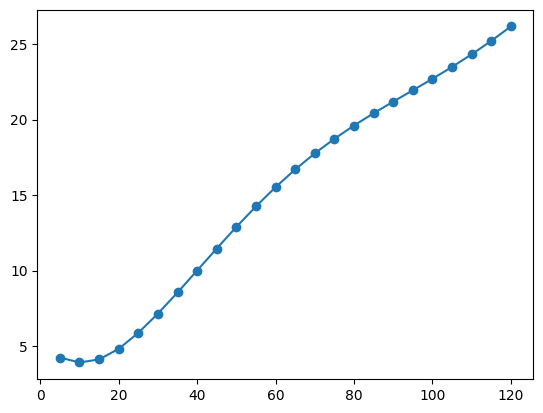

In [10]:
# Find RMSE of every horizon

from sklearn.metrics import mean_squared_error

rmse = []

for i, horizon in enumerate(horizons):
    actual = bg_predictor.scaler_y.inverse_transform(y_test)[:, i]
    pred = y_pred[:, i]
    rmse.append(np.sqrt(mean_squared_error(actual, pred)))


plt.plot(horizons, rmse, "o-")

horizons       MAE
0          5  1.740105
1         10  1.691044
2         15  1.760801
3         20  1.920506
4         25  2.122906
5         30  2.329233
6         35  2.532864
7         40  2.732005
8         45  2.917806
9         50  3.092789
10        55  3.250834
11        60  3.389473
12        65  3.509181
13        70  3.615937
14        75  3.710556
15        80  3.797065
16        85  3.878267
17        90  3.955674
18        95  4.029945
19       100  4.108561
20       105  4.189172
21       110  4.271496
22       115  4.357576
23       120  4.440928

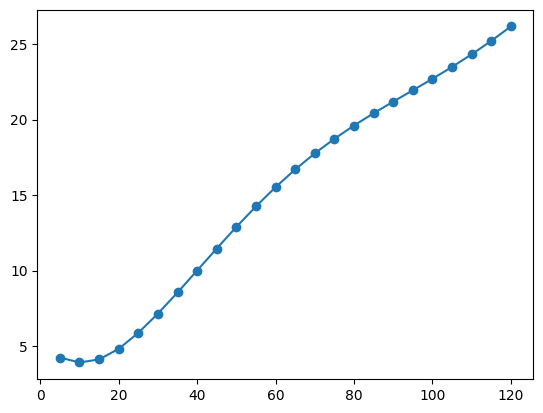

In [11]:
# Find MAE of every horizon

from sklearn.metrics import mean_absolute_error

mae = []

for i, horizon in enumerate(horizons):
    actual = bg_predictor.scaler_y.inverse_transform(y_test)[:, i]
    pred = y_pred[:, i]
    mae.append(np.sqrt(mean_absolute_error(actual, pred)))


plt.plot(horizons, rmse, "o-")

df = pd.DataFrame({"horizons": horizons, "MAE": mae})
df

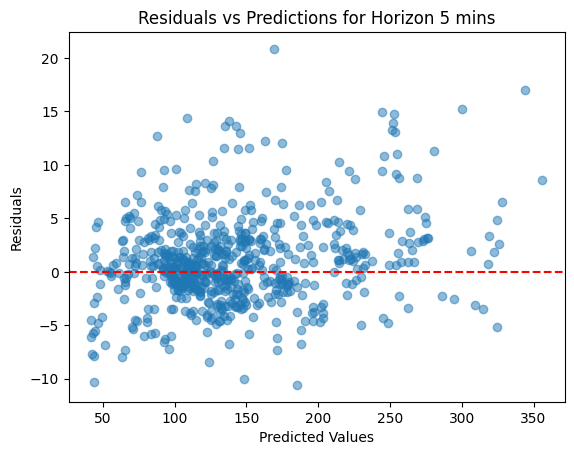

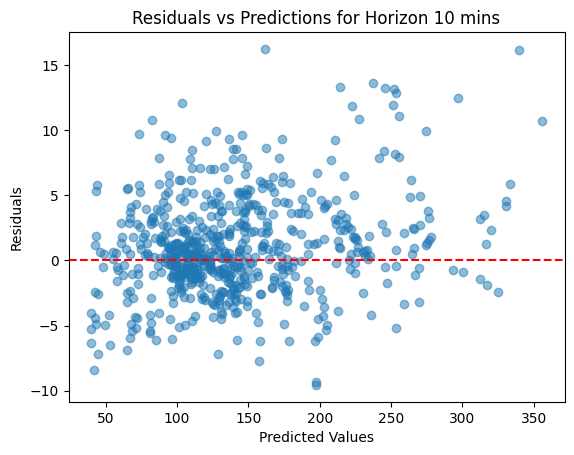

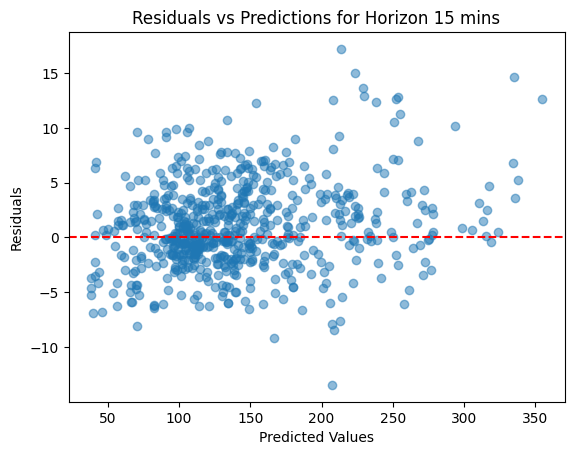

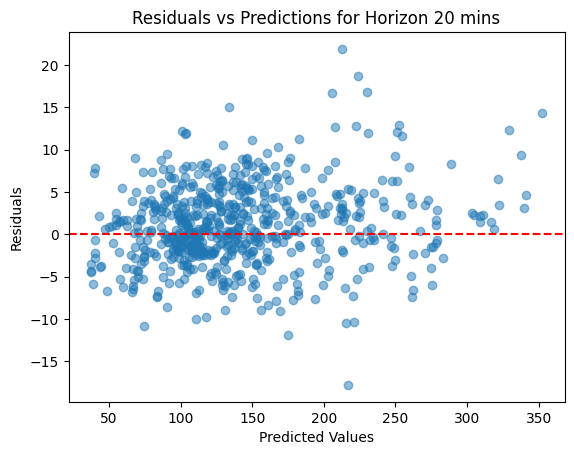

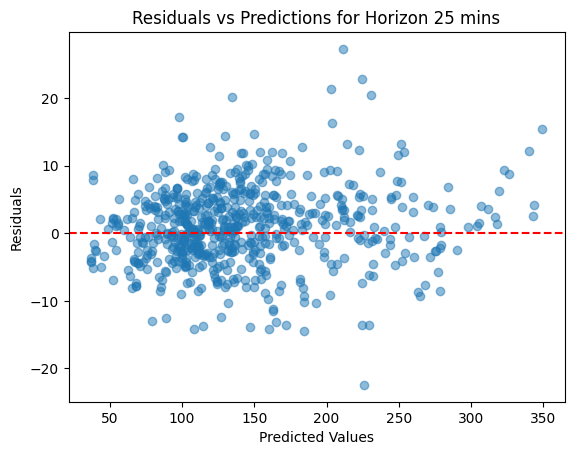

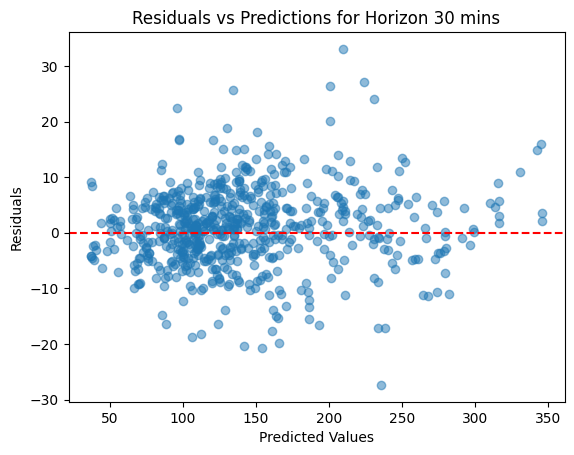

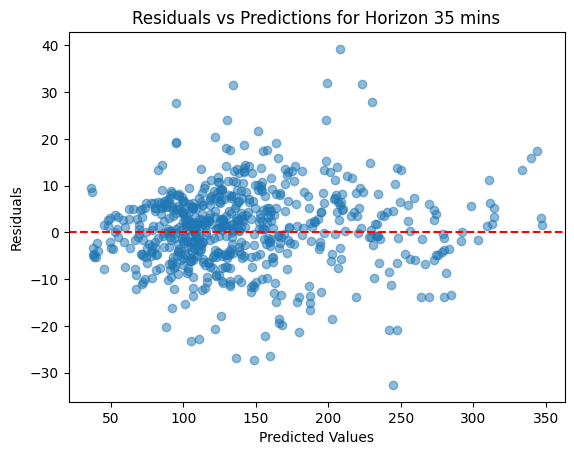

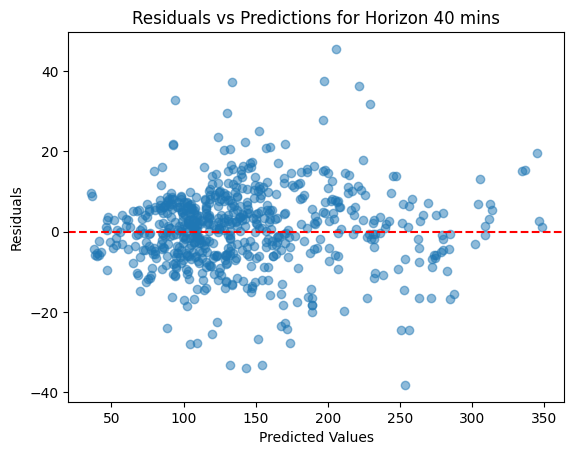

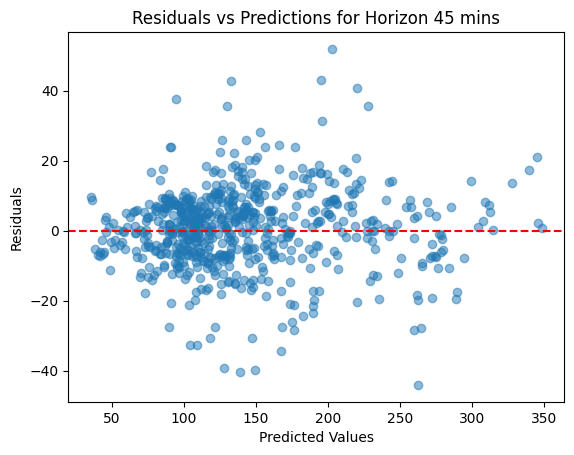

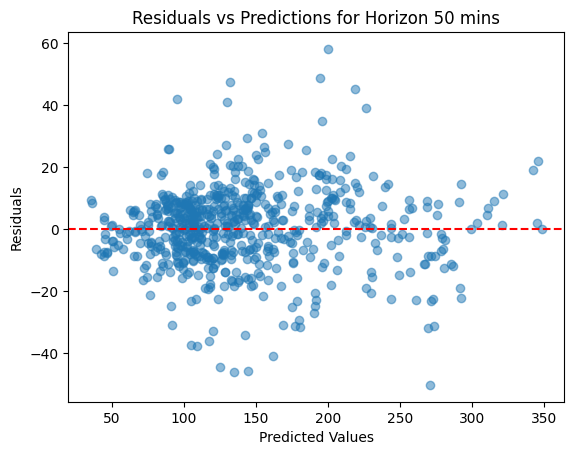

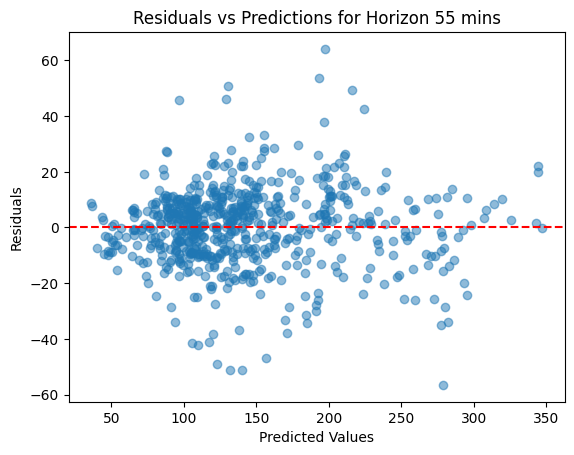

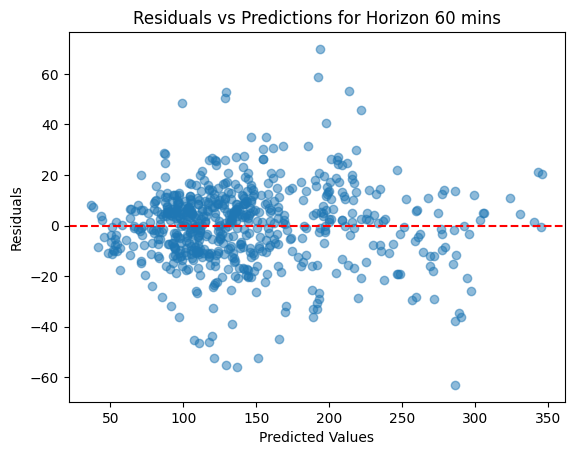

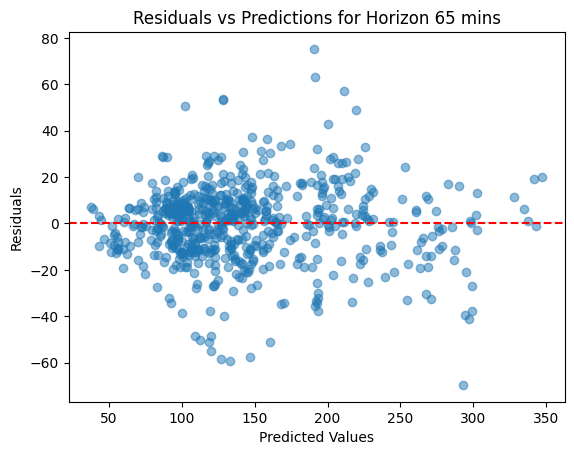

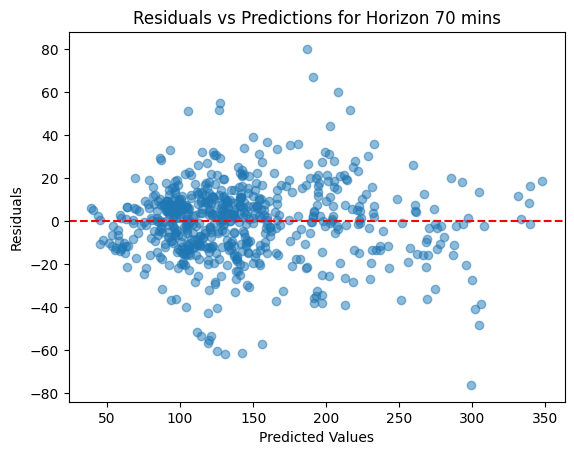

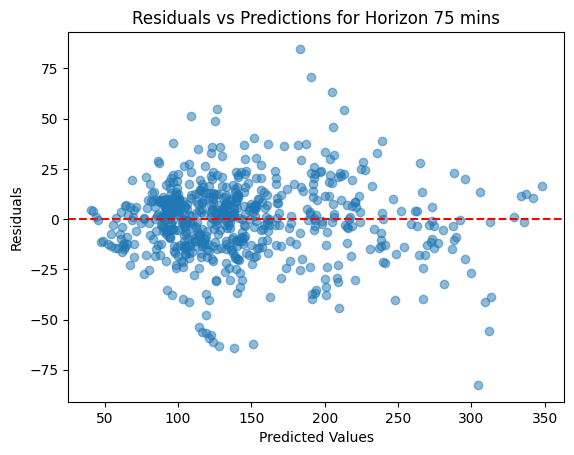

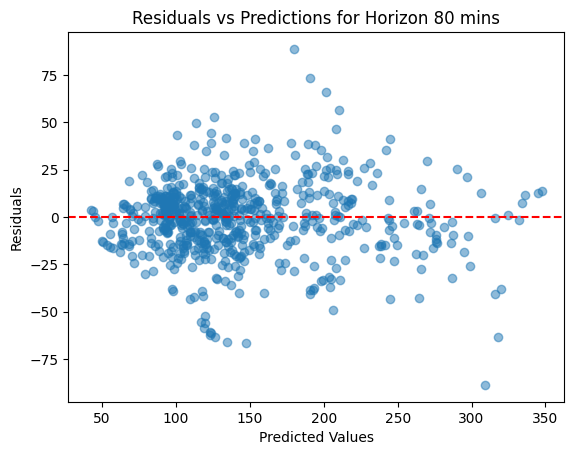

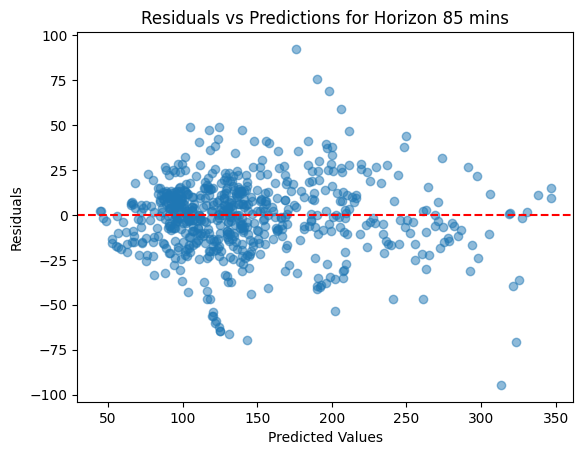

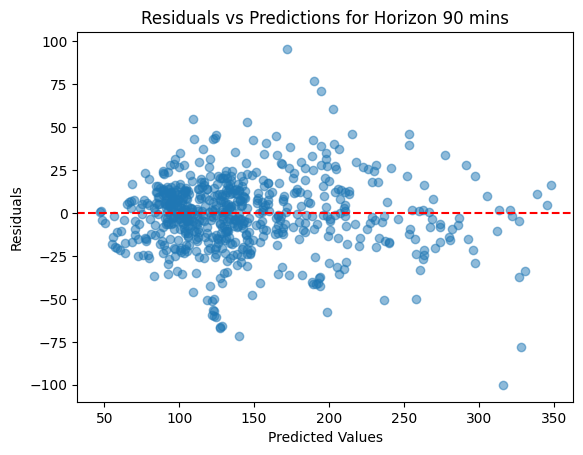

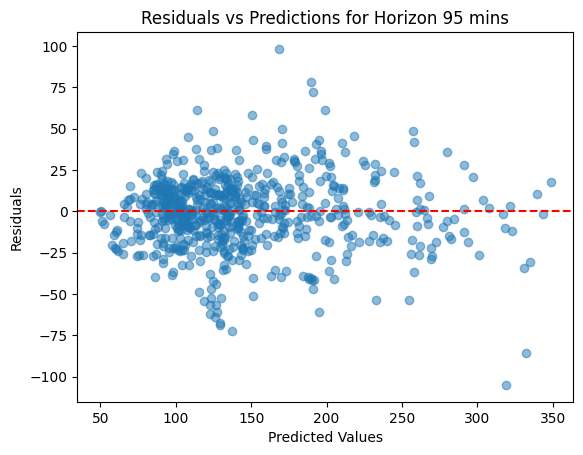

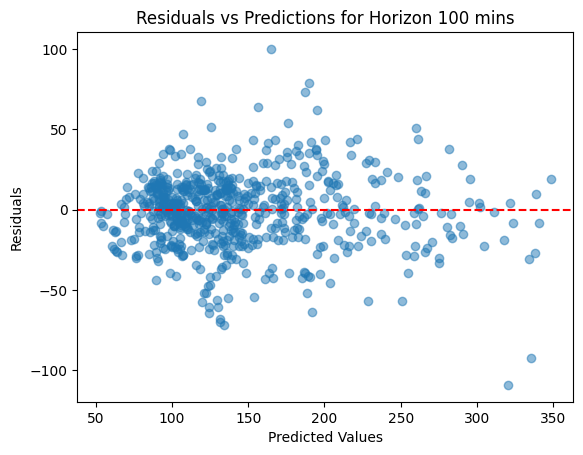

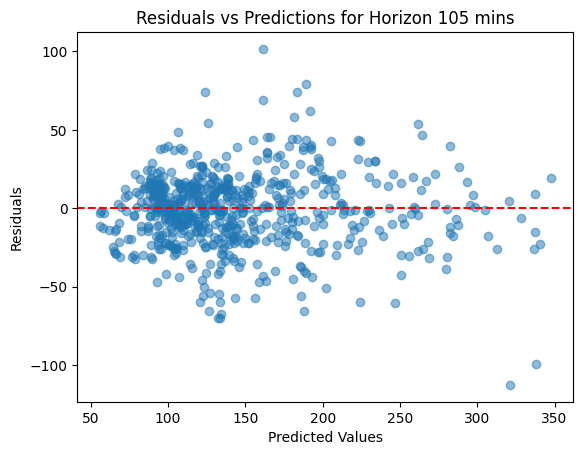

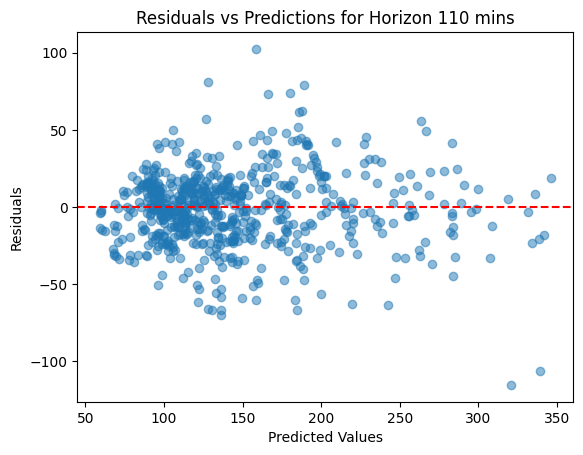

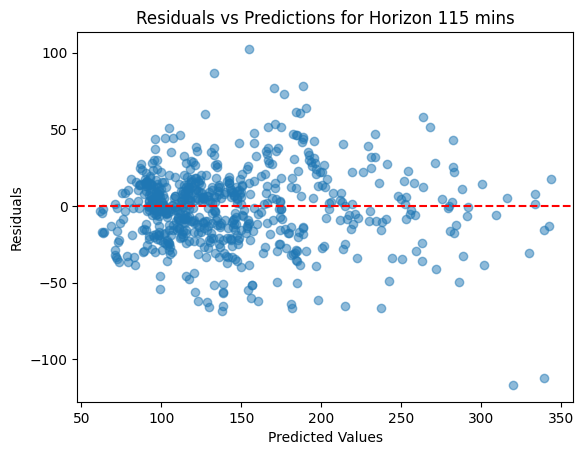

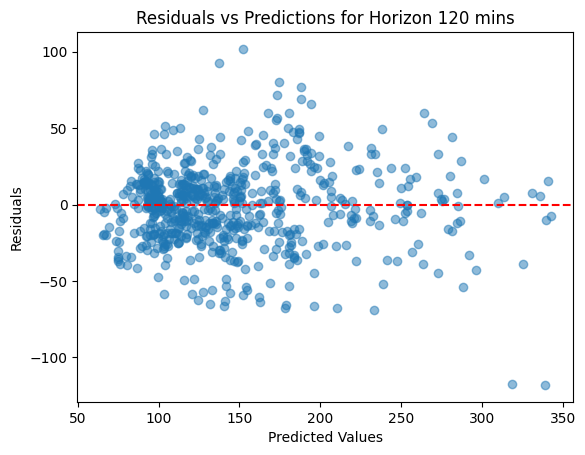

In [12]:
# Residuals

residuals_per_horizon = {f"Horizon_{h}": bg_predictor.scaler_y.inverse_transform(y_test)[:, i] - y_pred[:, i] for i, h in enumerate(horizons)}

for i, h in enumerate(horizons):
    plt.figure()
    plt.scatter(y_pred[:, i], residuals_per_horizon[f"Horizon_{h}"], alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuals vs Predictions for Horizon {h} mins')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()



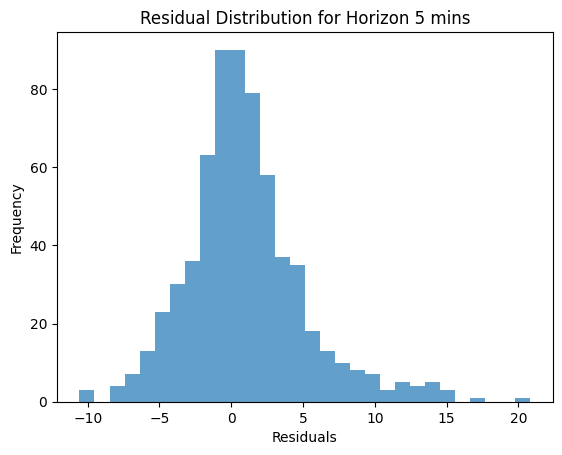

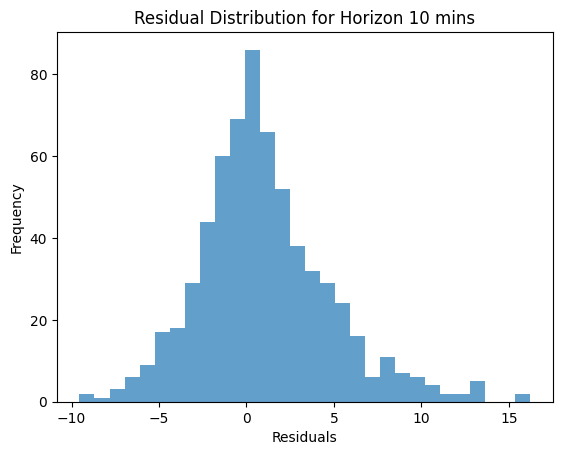

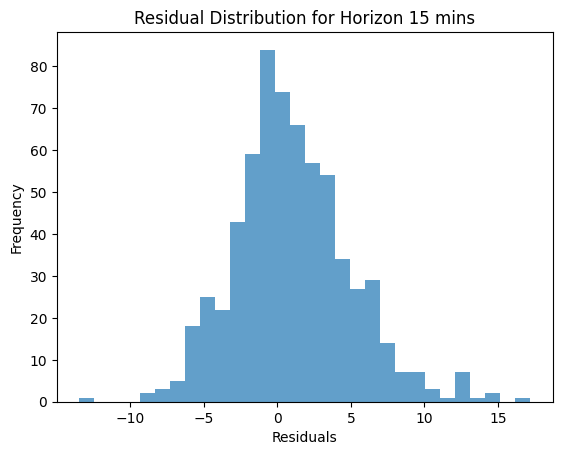

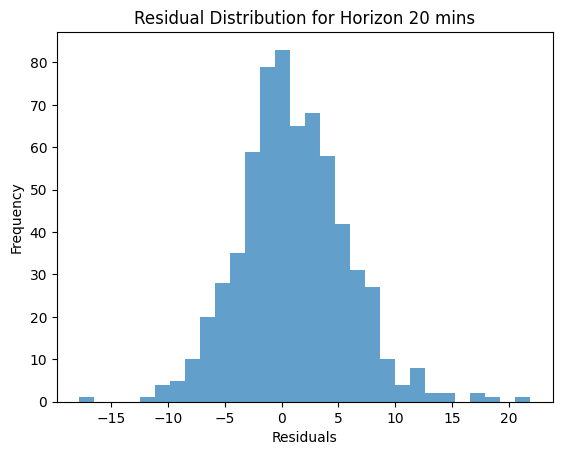

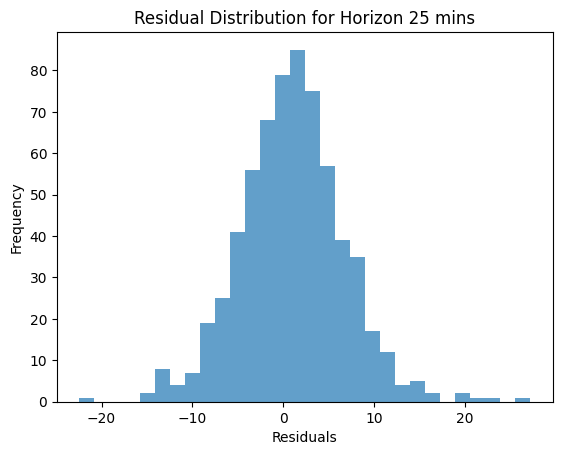

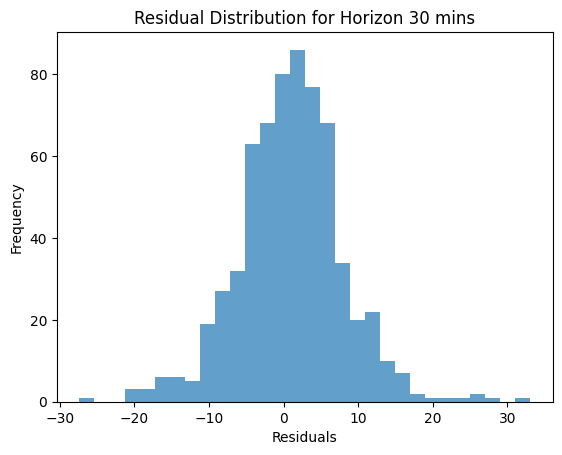

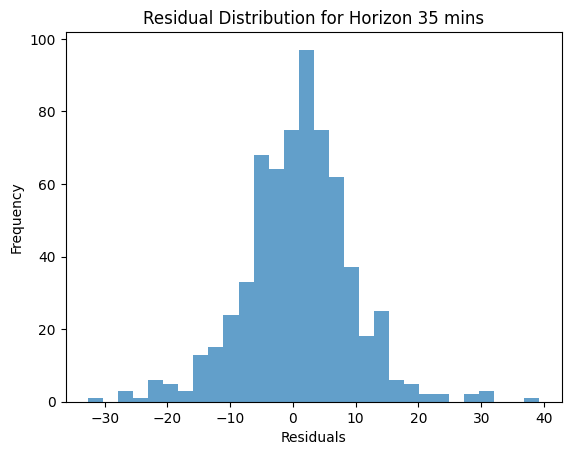

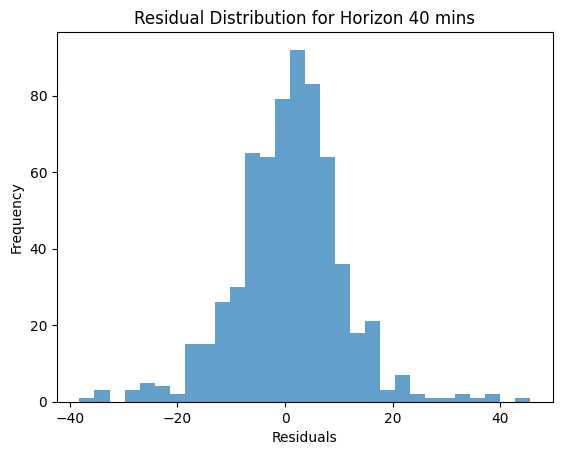

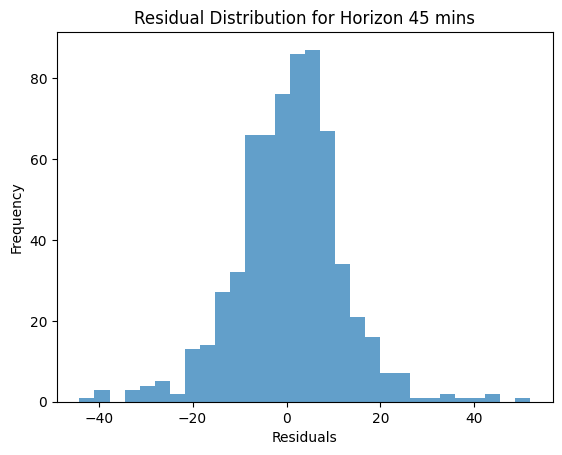

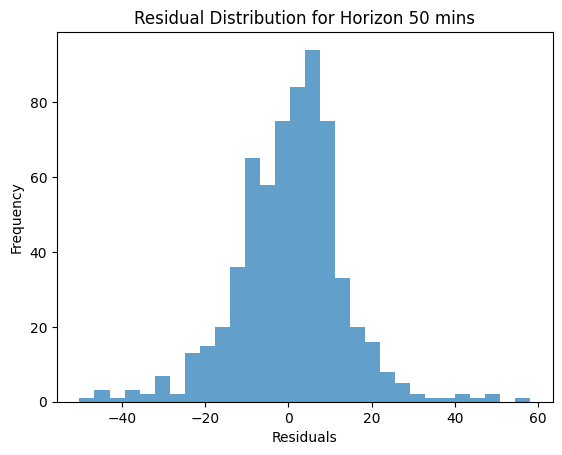

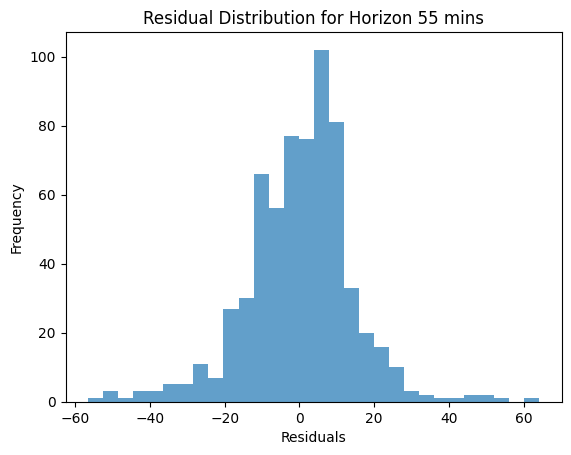

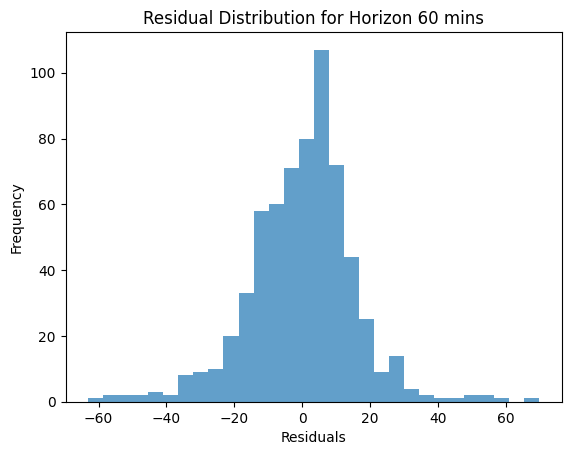

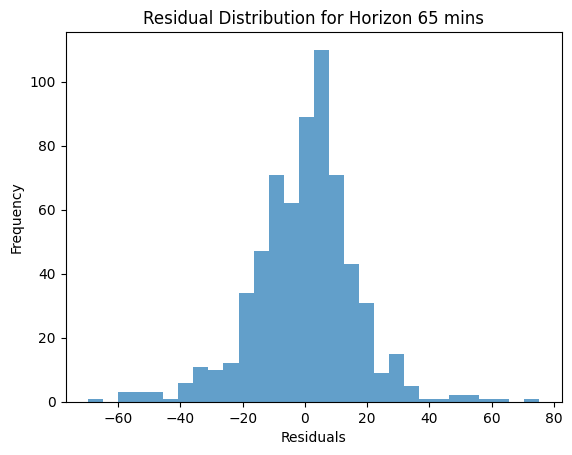

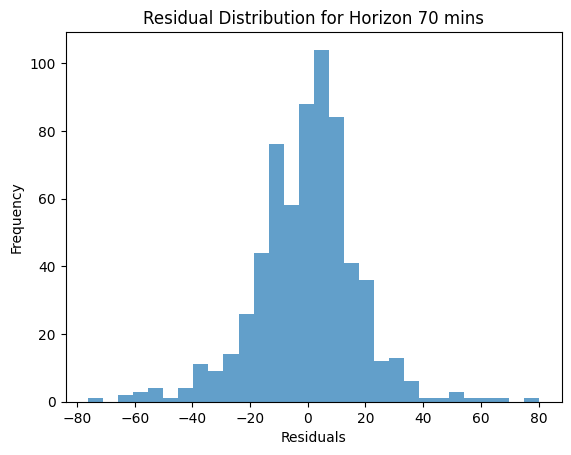

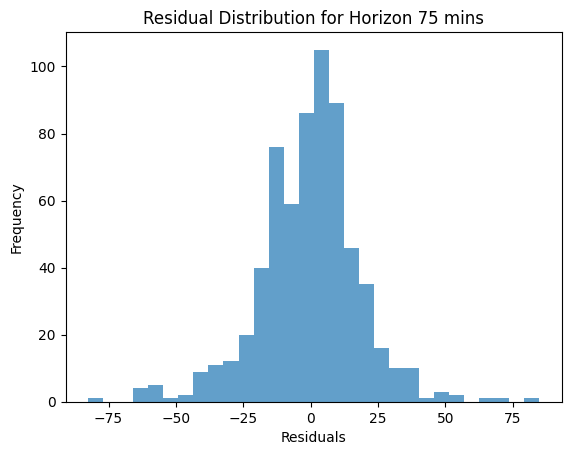

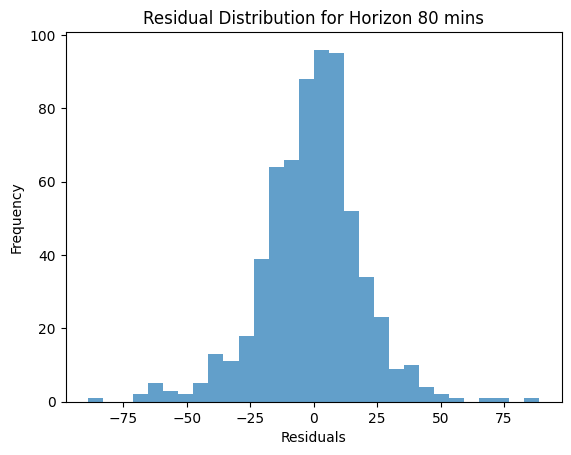

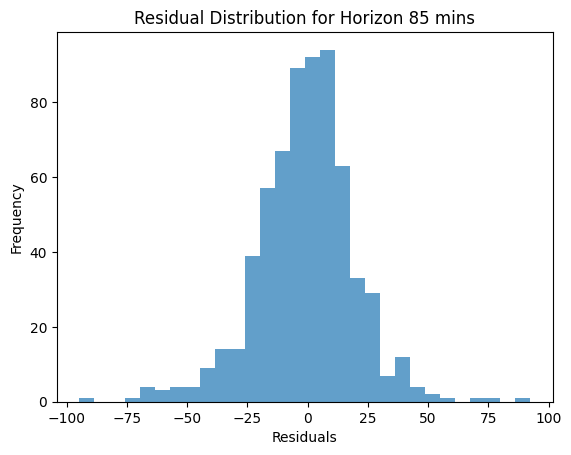

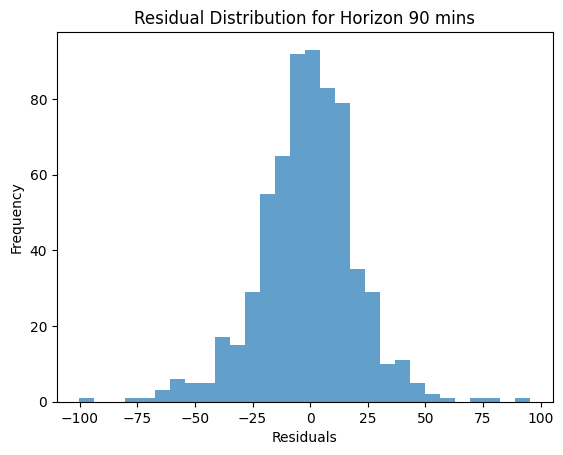

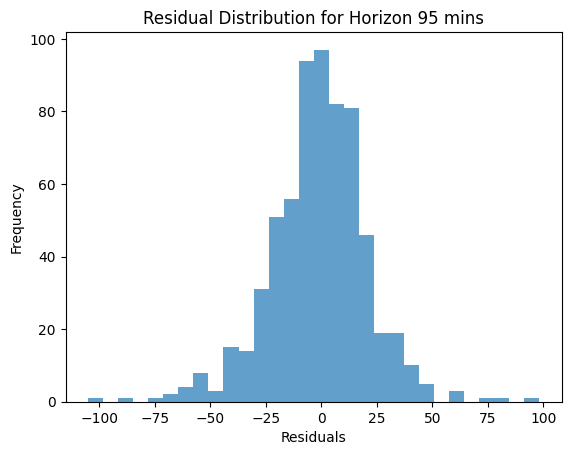

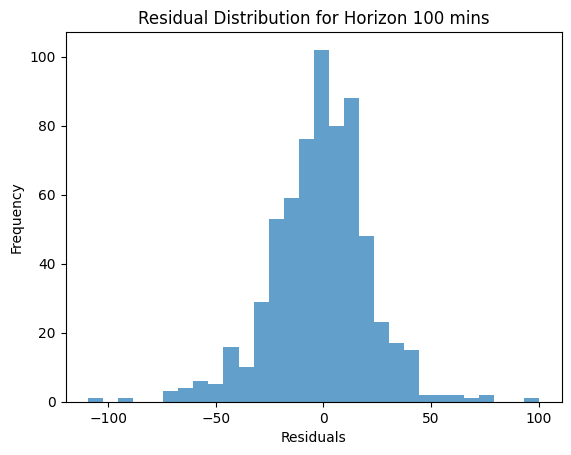

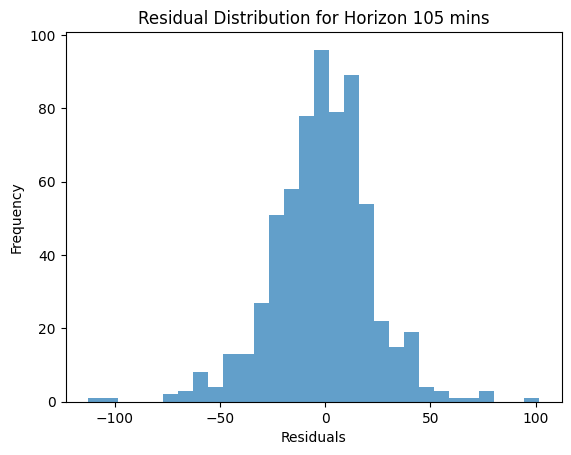

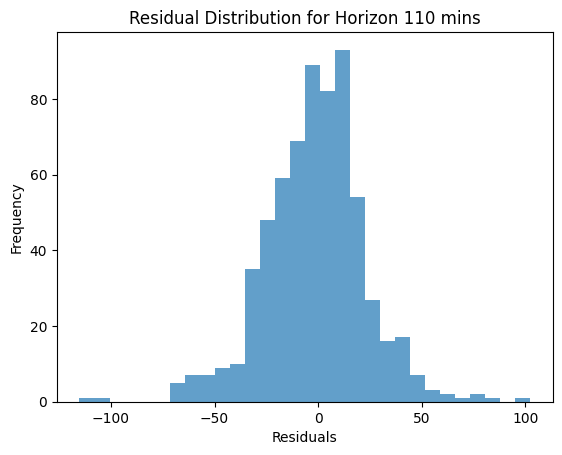

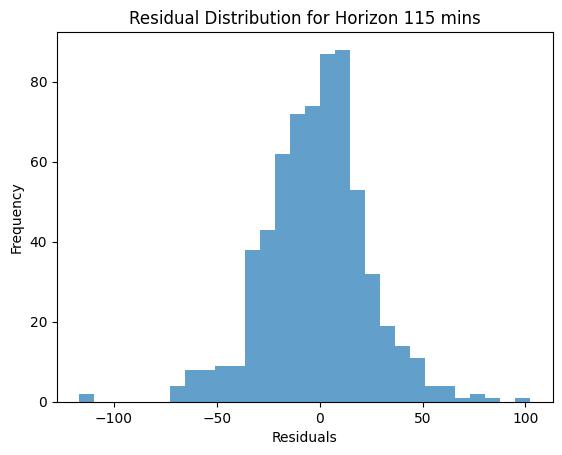

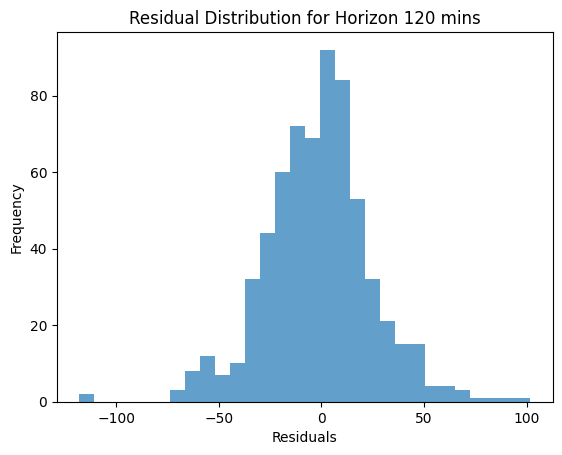

In [13]:
# Histogram of residuals

for i, h in enumerate(horizons):
    plt.figure()
    plt.hist(residuals_per_horizon[f"Horizon_{h}"], bins=30, alpha=0.7)
    plt.title(f'Residual Distribution for Horizon {h} mins')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

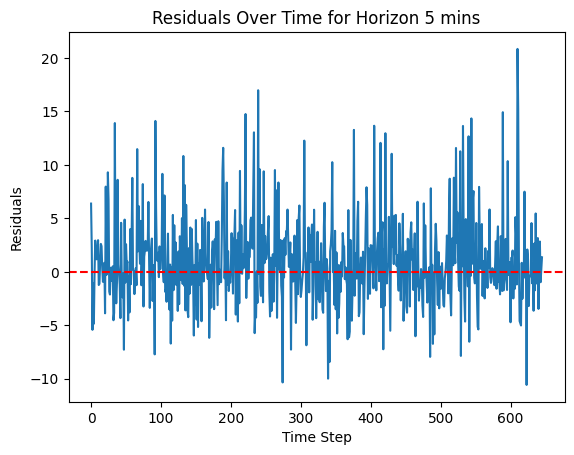

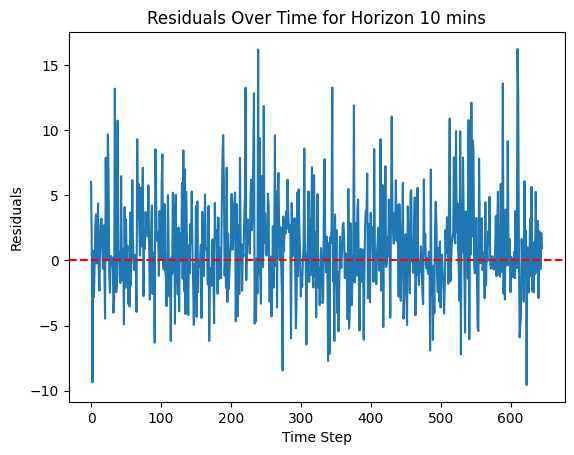

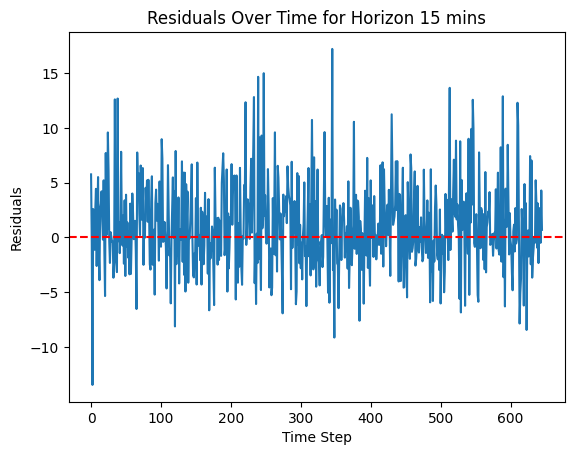

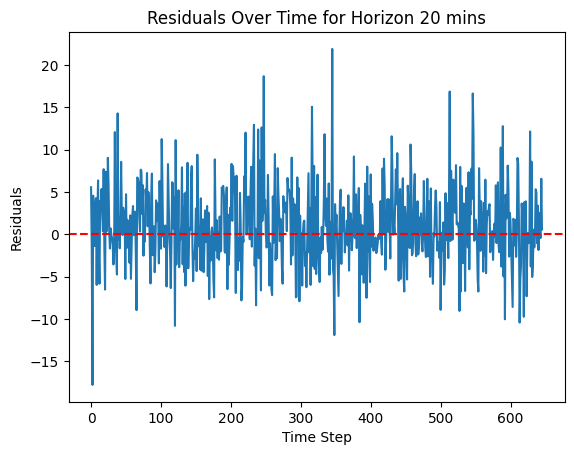

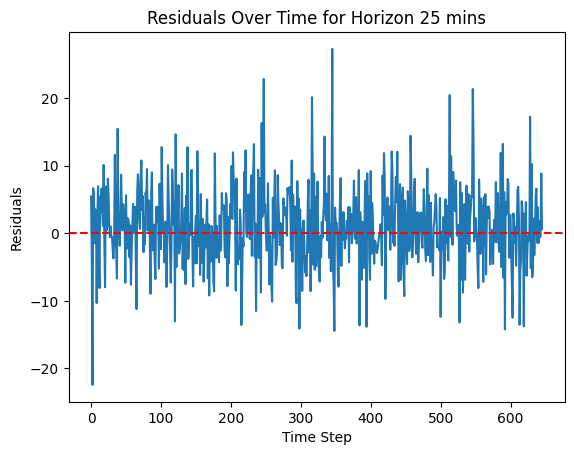

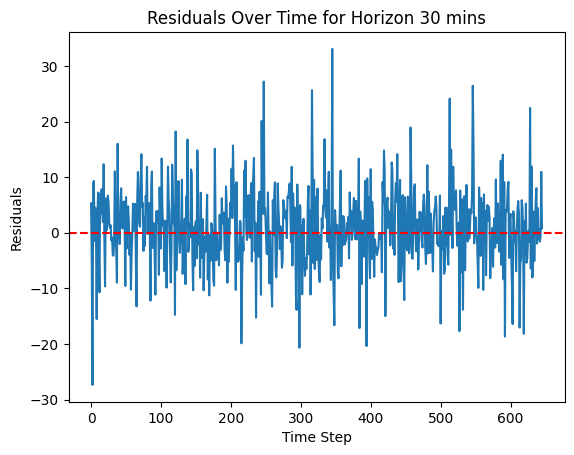

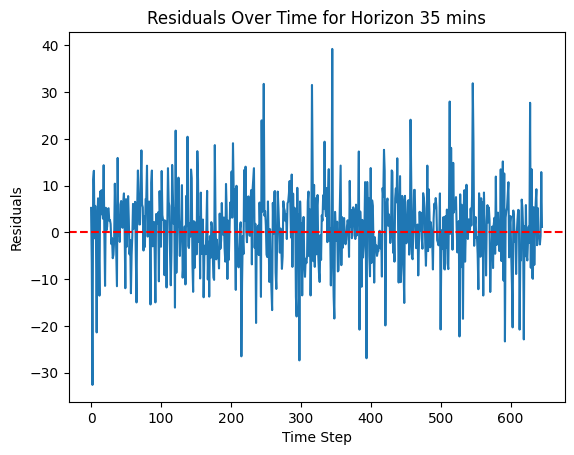

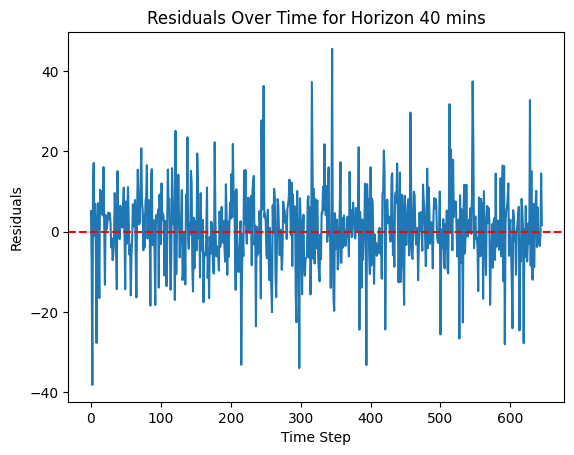

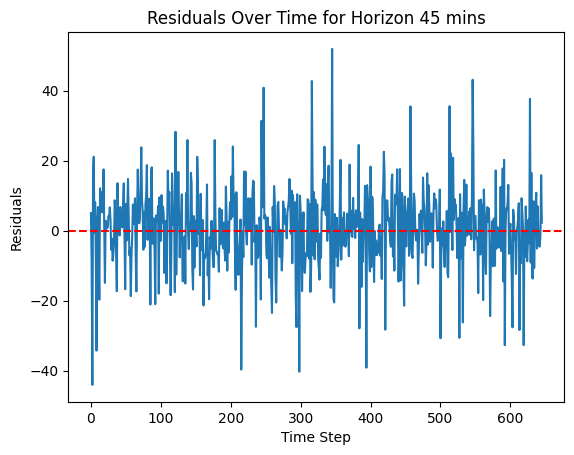

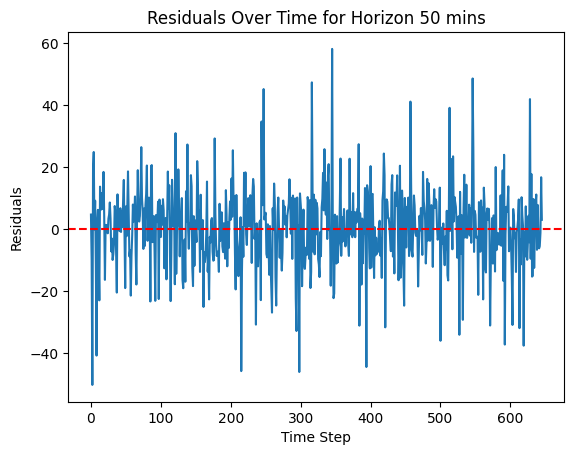

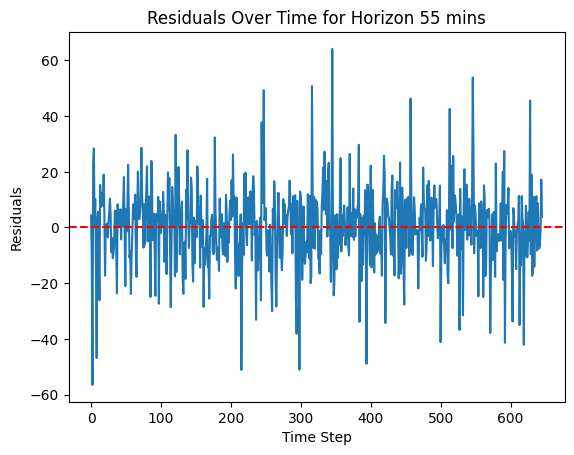

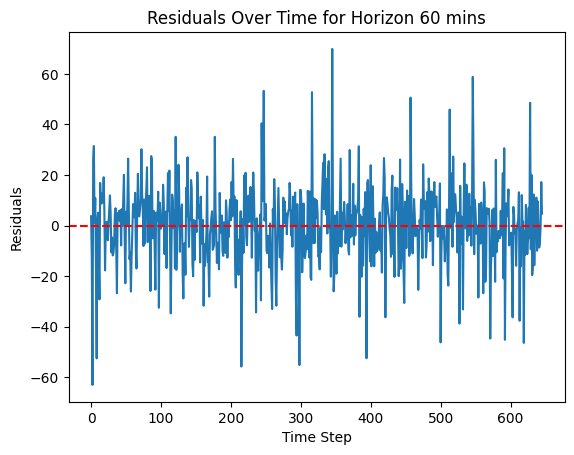

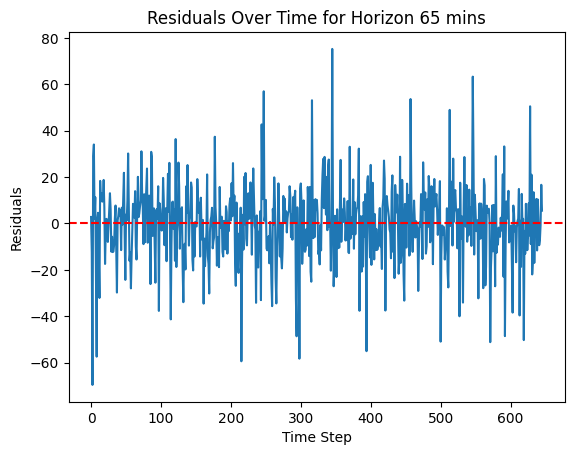

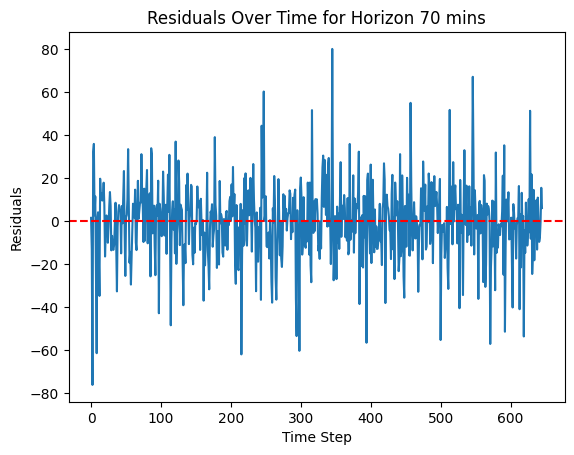

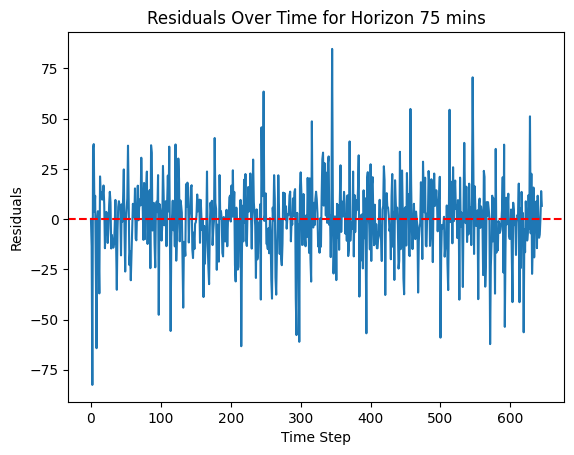

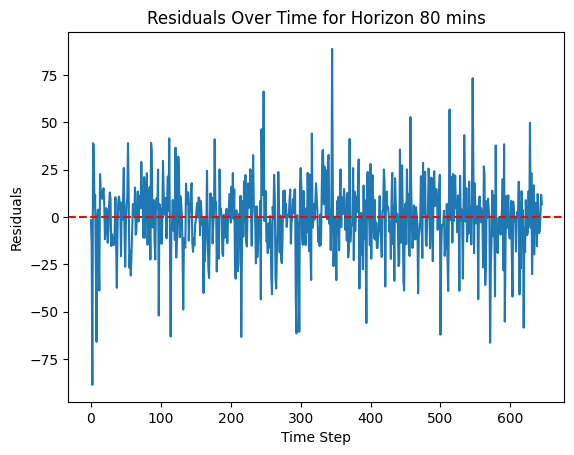

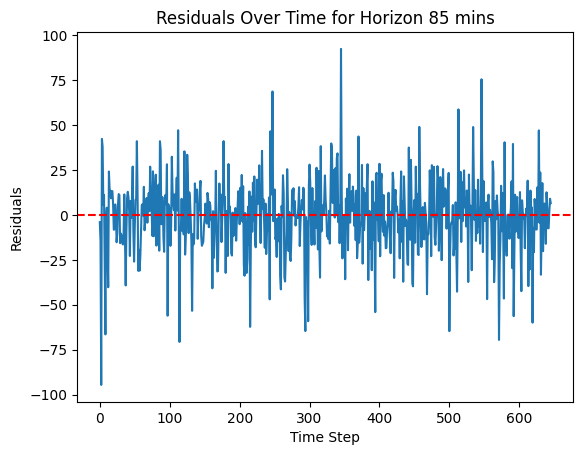

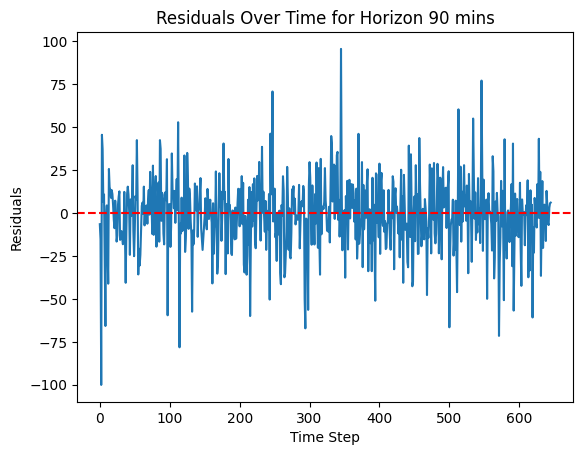

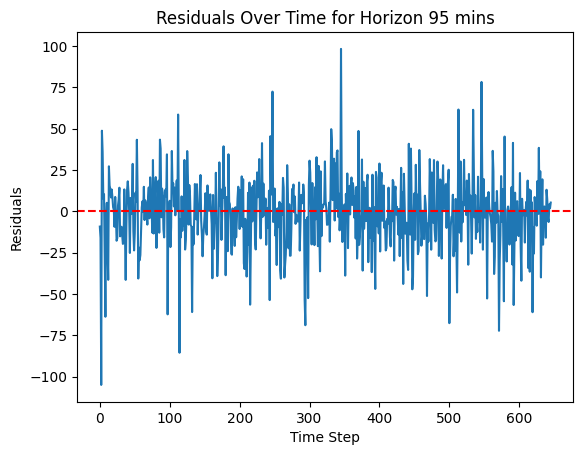

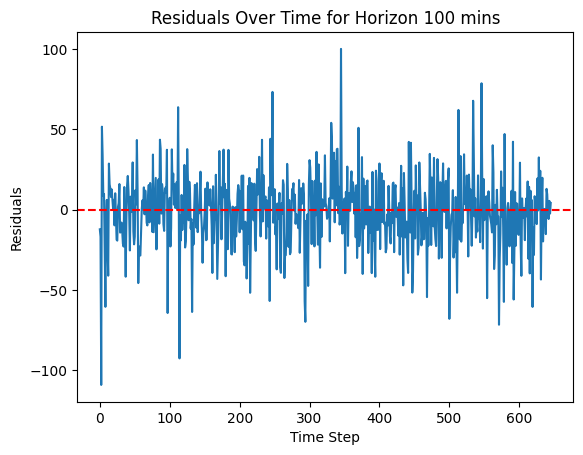

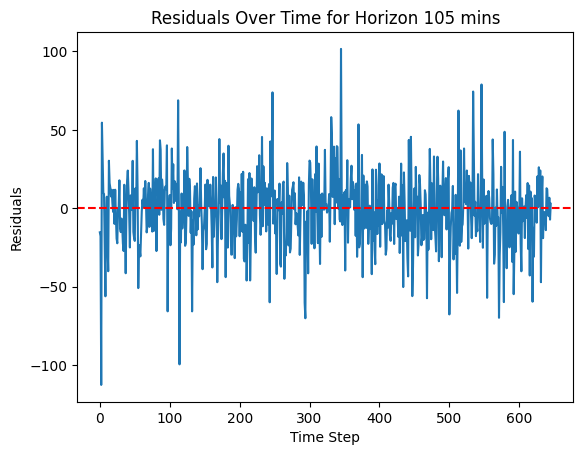

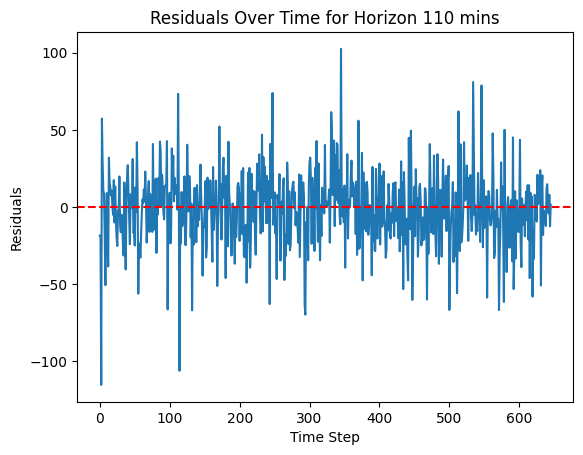

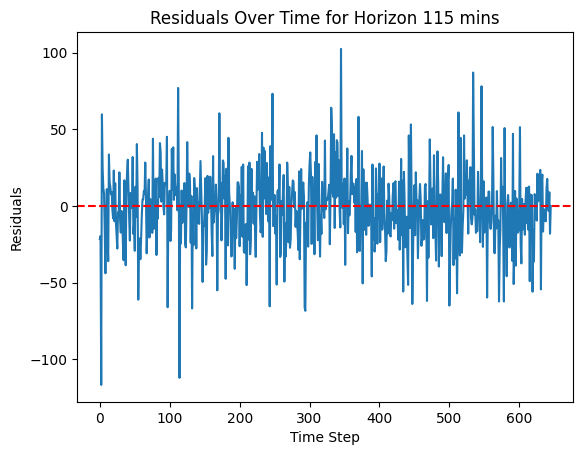

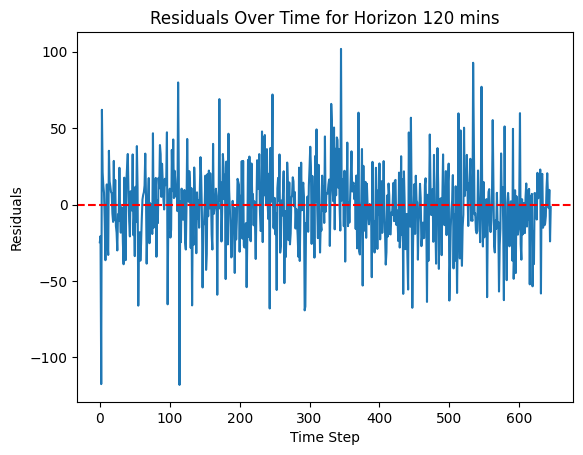

In [14]:
for i, h in enumerate(horizons):
    plt.figure()
    plt.plot(residuals_per_horizon[f"Horizon_{h}"])
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuals Over Time for Horizon {h} mins')
    plt.xlabel('Time Step')
    plt.ylabel('Residuals')
    plt.show()

In [15]:
for h in horizons:
    res = residuals_per_horizon[f"Horizon_{h}"]
    print(f"Horizon {h} mins: Mean={np.mean(res):.2f}, Std={np.std(res):.2f}")


Horizon 5 mins: Mean=0.97, Std=4.13
Horizon 10 mins: Mean=1.01, Std=3.79
Horizon 15 mins: Mean=1.04, Std=3.99
Horizon 20 mins: Mean=1.04, Std=4.71
Horizon 25 mins: Mean=1.01, Std=5.79
Horizon 30 mins: Mean=0.94, Std=7.09
Horizon 35 mins: Mean=0.85, Std=8.51
Horizon 40 mins: Mean=0.72, Std=9.98
Horizon 45 mins: Mean=0.57, Std=11.45
Horizon 50 mins: Mean=0.40, Std=12.88
Horizon 55 mins: Mean=0.22, Std=14.25
Horizon 60 mins: Mean=0.02, Std=15.52
Horizon 65 mins: Mean=-0.18, Std=16.69
Horizon 70 mins: Mean=-0.38, Std=17.75
Horizon 75 mins: Mean=-0.57, Std=18.71
Horizon 80 mins: Mean=-0.76, Std=19.59
Horizon 85 mins: Mean=-0.93, Std=20.39
Horizon 90 mins: Mean=-1.09, Std=21.15
Horizon 95 mins: Mean=-1.23, Std=21.90
Horizon 100 mins: Mean=-1.35, Std=22.65
Horizon 105 mins: Mean=-1.44, Std=23.43
Horizon 110 mins: Mean=-1.51, Std=24.26
Horizon 115 mins: Mean=-1.55, Std=25.15
Horizon 120 mins: Mean=-1.56, Std=26.11
